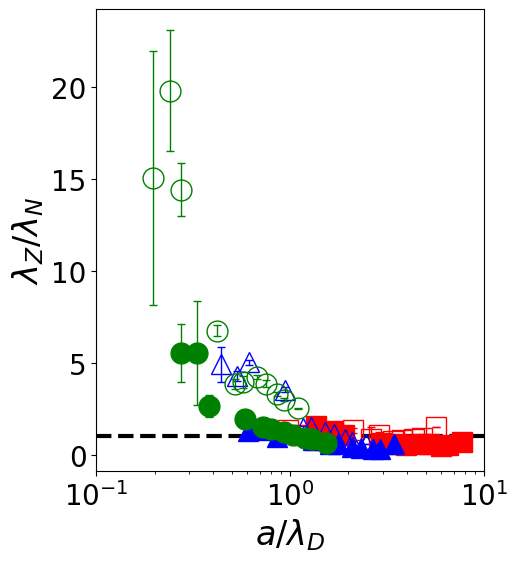

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# ---------- Load reference x-data (a/λ_D) ---------- #
x_df = pd.read_csv("a_lambda_d.csv")

# ---------- Color & marker mapping ---------- #
color_map = {'0.2': 'red', '1': 'blue', '5': 'green'}
marker_map = {'0.2': 's', '1': '^', '5': 'o'}

fig, ax = plt.subplots(figsize=(5, 6))

def ratio_error_independent(a, sa, b, sb):
    a = np.array(a)
    sa = np.array(sa)
    b = np.array(b)
    sb = np.array(sb)
    c = np.array(a / b)
    sc = np.array(np.abs(c) * np.sqrt((sa / a)**2 + (sb / b)**2))
    return c, sc

def power_func(x, A, alpha):
    return A * x**(alpha)

# ---------- Plot for each condition ---------- #
for dtype in ['MD']:#, 'LD']:
    for eps in ['0.2', '1', '5']:
        for pot in ['LJ', 'WCA']:


            nnname = f"nnfit_params_{dtype}_{eps}_{pot}.csv"
            n_df = pd.read_csv(nnname)
            zzname = f"zzfit_params_{dtype}_{eps}_{pot}.csv"
            z_df = pd.read_csv(zzname)

            # --- x = lambda_Z/lambda_N --- #
            x = x_df[f"{eps}_{pot}"]
            x = np.array(x)

            # --- y = λ_fit / λ_D --- #

            # --- Error propagation --- #
            lambda_N = n_df["lambda_fit"].to_numpy()
            lambda_N_err = n_df["lambda_fit_error"].to_numpy()

            lambda_Z = z_df["lambda_fit"].to_numpy()
            lambda_Z_err = z_df["lambda_fit_error"].to_numpy()

            y, y_err = ratio_error_independent(lambda_Z, lambda_Z_err, lambda_N, lambda_N_err)


            # --- Marker style --- #
            filled = (pot == "LJ")

            if dtype == "MD":
                color = color_map[eps]
                zorder_temp = 1000
            else:  # LD dataset
                color = "black"
                zorder_temp=1

            ax.errorbar(
                x, y, yerr=y_err,
                fmt=marker_map[eps],
                markersize=15,
                color=color,
                mfc=color if filled else 'none',
                mec=color,
                ecolor=color,
                elinewidth=1,
                capsize=3,
                label=f"{eps} {pot}"
            )


# ---------- Axes ---------- #
ax.set_xscale('log')
ax.set_xlim(0.1,10)
ax.set_xlabel(r'${a}/{\lambda_D}$', fontsize=24)
ax.set_ylabel(r'${\lambda_Z}/{\lambda_N}$', fontsize=24)
ax.tick_params(axis='both', which='both', labelsize=20)
plt.axhline(y=1, linestyle="--", linewidth=3, color="black")
# plt.ylim (-0.5,6)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


# plt.tight_layout()
plt.show()

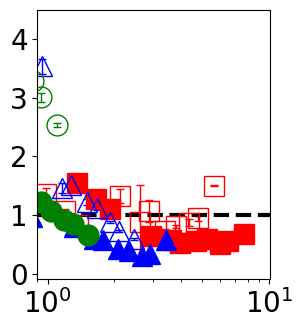

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# ---------- Load reference x-data (a/λ_D) ---------- #
x_df = pd.read_csv("a_lambda_d.csv")

# ---------- Color & marker mapping ---------- #
color_map = {'0.2': 'red', '1': 'blue', '5': 'green'}
marker_map = {'0.2': 's', '1': '^', '5': 'o'}

fig, ax = plt.subplots(figsize=(3,3.5))

def ratio_error_independent(a, sa, b, sb):
    a = np.array(a)
    sa = np.array(sa)
    b = np.array(b)
    sb = np.array(sb)
    c = np.array(a / b)
    sc = np.array(np.abs(c) * np.sqrt((sa / a)**2 + (sb / b)**2))
    return c, sc

def power_func(x, A, alpha):
    return A * x**(alpha)

# ---------- Plot for each condition ---------- #
for dtype in ['MD']:#, 'LD']:
    for eps in ['0.2', '1', '5']:
        for pot in ['LJ', 'WCA']:


            nnname = f"nnfit_params_{dtype}_{eps}_{pot}.csv"
            n_df = pd.read_csv(nnname)
            zzname = f"zzfit_params_{dtype}_{eps}_{pot}.csv"
            z_df = pd.read_csv(zzname)

            # --- x = lambda_Z/lambda_N --- #
            x = x_df[f"{eps}_{pot}"]
            x = np.array(x)

            # --- y = λ_fit / λ_D --- #

            # --- Error propagation --- #
            lambda_N = n_df["lambda_fit"].to_numpy()
            lambda_N_err = n_df["lambda_fit_error"].to_numpy()

            lambda_Z = z_df["lambda_fit"].to_numpy()
            lambda_Z_err = z_df["lambda_fit_error"].to_numpy()

            y, y_err = ratio_error_independent(lambda_Z, lambda_Z_err, lambda_N, lambda_N_err)


            # --- Marker style --- #
            filled = (pot == "LJ")

            if dtype == "MD":
                color = color_map[eps]
                zorder_temp = 1000
            else:  # LD dataset
                color = "black"
                zorder_temp=1

            ax.errorbar(
                x, y, yerr=y_err,
                fmt=marker_map[eps],
                markersize=15,
                color=color,
                mfc=color if filled else 'none',
                mec=color,
                ecolor=color,
                elinewidth=1,
                capsize=3,
                label=f"{eps} {pot}"
            )


# ---------- Axes ---------- #
ax.set_xscale('log')
ax.set_xlim(0.9,10.1)
# ax.set_xlabel(r'${a}/{\lambda_D}$', fontsize=24)
# ax.set_ylabel(r'${\lambda_Z}/{\lambda_N}$', fontsize=24)
ax.tick_params(axis='both', which='both', labelsize=20)
plt.axhline(y=1, linestyle="--", linewidth=3, color="black")
plt.ylim (-0.1,4.5)
plt.xticks(fontsize=20)
plt.yticks([0,1,2,3,4], fontsize=20)
# plt.yticklabels(['0.5', '0.2'], fontsize=20)

plt.show()


# plt.tight_layout()
plt.show()